In [1]:
#Importing the training set
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

C:\ANACONDA\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Importing the training set1
dataset_train=pd.read_csv('Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[:,1:2].values #Just taking the OPEN column

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [4]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [5]:
#Creating a dta structure with 60 time steps and 1 output
X_train=[]
Y_train=[]
#Populating the two entities
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0]) #it is memorizing what is there 60 time steps before
    Y_train.append(training_set_scaled[i, 0])
#Now we have to convert the X_train and Y_train to numpy array so that they can be recognized by the RNN
X_train,Y_train=np.array(X_train),np.array(Y_train)

In [6]:
print(Y_train.shape)

(1198,)


In [7]:
#Reshaping the data
X_train=np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))#1 corresponds to the number of predictors which is in our case oly the OPEN column

In [8]:
print(X_train.shape)

(1198, 60, 1)


In [9]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
#Inilializing the RNN
regressor=Sequential()

In [11]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=( X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


In [12]:
#layer 2
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
#Layer 3
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
#Layer 4
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

In [13]:
#Adding the last Dense Layer
regressor.add(Dense(units=1))

In [14]:
#Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#Training the RNN
regressor.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 37s 30ms/step - loss: 0.0642
Epoch 2/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0068
Epoch 3/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0062
Epoch 4/100
1198/1198 [==============================] - 26s 21ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 20s 16ms/step - loss: 0.0014
Epoch 96/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0015


In [16]:
#Importing the test dataset
dataset_test=pd.read_csv('Recurrent_Neural_Networks/Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values #Just taking the OPEN column

In [18]:
#Getting the prediction stock price for 2017

dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)


In [19]:
print(predicted_stock_price)

[[779.7731 ]
 [776.8585 ]
 [776.53046]
 [777.78326]
 [781.2572 ]
 [787.5095 ]
 [793.87213]
 [797.33826]
 [798.325  ]
 [797.9858 ]
 [797.22015]
 [796.36957]
 [795.6788 ]
 [795.7739 ]
 [796.5088 ]
 [800.75336]
 [807.8399 ]
 [816.0782 ]
 [821.48615]
 [818.7279 ]]


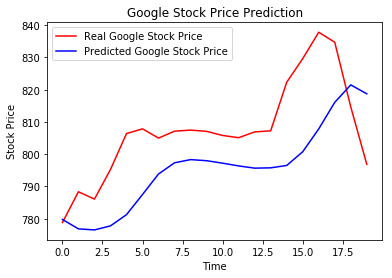

In [21]:
#Visualization
plt.plot(real_stock_price, color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()